# Machine Learning Python Exercise 1.1: Linear Regression

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data plotting
import numpy.matlib

# 3D plotting
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import os
print(os.listdir("../ex1"))

['.ipynb_checkpoints', 'Coursera_MachineLearningPython_ex1.zip', 'ex1data1.txt', 'ex1data2.txt', 'ex1_part_1.ipynb', 'ex1_part_2_multi.ipynb', 'ex1_try1.ipynb', 'Machine_Learning_ex1_python_old.zip', 'Untitled.ipynb']


## Instructions

This file contains code that helps you get started on the exercise. You will need to complete functions in this exercise. The instructions can be found in this notebook, which will load the program as you complete the exercises. If you need to change the code in a certain section, it will be clearly indicated.

### Complete this warmUpExercice file:
 Make sure the function warmUpExercise() returns a nxn identity matrix in A


In [2]:
A = []   # initialize array

def warmUpExercise(n):    # define fucntion to reference later
    ## Your code
    
    # Correct answer:
    A = np.matlib.identity(n) # put a nxn identity matrix in A
    return A

## Part 1: Basic Function

In [3]:
print("Running warmUpExercise ... \n")
print("5x5 Identity Matrix: \n")
A = warmUpExercise(5) # call the warmUpExercise function with n = 5, so a 5x5 identity matrix is printed
print(A) # print the nxn array in A

Running warmUpExercise ... 

5x5 Identity Matrix: 

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### Complete this plotData file:
plotData plots the data points X and y into a new figure and gives the figure axis label population and profit.

Instructions: Plot the training data into a figure. Set the axes labels using ax.set_xlabel and ax.set_ylabel. Assume the population and revenue data have been passed in as the x and y arguments of this function.

In [4]:
def plotData(x,y):                               # define function to reference later
    ## Your code

    # Correct answer:
    plt.scatter(x, y, color = 'r', marker = 'x') # set plotting parameters (colour=red, marker=crsoss)
    plt.xlabel('Population of City in 10,000s')  # set the x-axis label
    plt.ylabel('Profit in $10,000s')             # set the y-axis label
    plt.show()                                   # plot the data

## Part 2: Plotting

Plotting Data ...



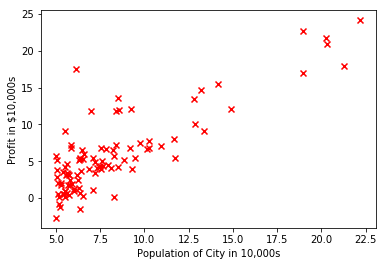

In [5]:
print('Plotting Data ...\n')
data = np.array(pd.read_csv('ex1data1.txt', sep=",", header=None)) # import the data
X = data[:,0].reshape((97,1))   # initialize data X
y = data[:,1].reshape((97,1))   # initialize data y
m = len(X)                      # initialize value for m
plotData(X,y)                   # call the plotData function with X and y as arguments

### Complete this computeCost file
Compute cost computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.

Instructions: Compute the cost of a particular choice of theta using computeCost(X, y, theta).

In [6]:
# Initialize some useful values
m = len(y) # number of training examples

def computeCost(x,y,theta):                             # define function to reference later
    ## Your code
    
    # correct answer 
    error = ((np.dot(x,theta)-y))                       # define first part of squared error function
    error_transpose = ((error.conj().T))                # define transpose of error
    return (1/(2*m) * (np.dot(error_transpose,error)))  # have the function return the value of the cost

## Part 3.1: Cost

In [7]:
ones = np.ones((len(X))) # initialize array with ones size 91x1
X = np.c_[ones,X]        # add a column of ones to x
theta = np.zeros((2,1))  # initialize fitting parameters

# Gradient descent settings
iterations = 1500
alpha = 0.01

In [8]:
print("\nTesting the cost function ...\n")
# compute and display initial cost
J = computeCost(X,y,theta)                    # call cost function and put cost in J

print("With theta = [0 ; 0]\nCost computed = %f" % J)
print("Expected cost value (approx) 32.07\n")

# further testing of the cost function
J = computeCost(X, y, np.array([[-1],[2]]))   # call cost function with theta=[-1;2]

print('\nWith theta = [-1 ; 2]\nCost computed = %f \n' % J)
print('Expected cost value (approx) 54.24\n')


Testing the cost function ...

With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07


With theta = [-1 ; 2]
Cost computed = 54.242455 

Expected cost value (approx) 54.24



### Complete this gradientDescent file:
Performs gradient descent to learn theta. It updates theta by taking num_iters gradient steps with learning rate alpha.

Instructions: Write a function that performs a gradient descent step on the parameter function every time it loops. The function takes 5 arguments: X, y, theta, alpha, and num_iters.


In [9]:
def gradientDescent(x,y,theta,alpha,num_iters):
    # Initialize some useful values
    m = len(y) # number of training examples
    xTrans = x.transpose() # defines transpose of X
    J_history = np.zeros((num_iters,1)) # initializes J_history as a num_itersx1 array
    for i in range(0, num_iters):
        ## Your answer
        
        # Correct answer
        h = np.dot(x, theta) # X * theta
        loss = h - y         # X * theta - y
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
        
        ## End of your answer
        # Saves costs in J_history
        J_history[i] = np.sum(loss ** 2) / (2 * m)   # cost function J

    return theta, J_history

## Part 3.2: Gradient descent

In [10]:
print("\nRunning Gradient Descent ...\n")
[theta, J_history] = gradientDescent(X,y,theta,alpha,iterations) # run gradientDescent and store outcomes in theta and J_history

print('Theta found by gradient descent:\n')
print('%f \n %f \n' % (theta[0], theta[1]))
print('Expected theta values (approx)\n');
print(' -3.6303\n  1.1664\n\n');


Running Gradient Descent ...

Theta found by gradient descent:

-3.630291 
 1.166362 

Expected theta values (approx)

 -3.6303
  1.1664




### Part 3.2.2: Plotting

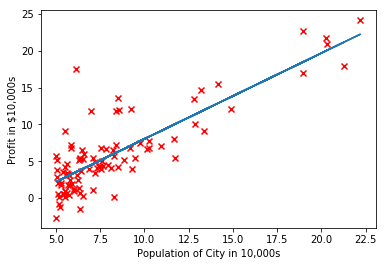

In [11]:
plt.scatter(X[:,1], y, color = 'r', marker = 'x') # set plotting parameters 
                                                  # of original scatter plot
plt.xlabel('Population of City in 10,000s')  # set the x-axis label
plt.ylabel('Profit in $10,000s')             # set the y-axis label
plt.plot(X[:,1], np.dot(X,theta), '-')       # plot regression line
plt.show()                                   # plot the data

## Part 3.3: Predicting

In [12]:
predict1 = np.dot(np.array([1, 3.5]), theta) * 10000 # new data * theta * 10000 because scale
print('For population = 35,000, we predict a profit of %f \n' % predict1)
predict2 = np.dot(np.array([1, 7]), theta) * 10000   # new data * theta * 10000 because scale
print('For population = 70,000, we predict a profit of %f \n' % predict2)

For population = 35,000, we predict a profit of 4519.767868 

For population = 70,000, we predict a profit of 45342.450129 



## Part 4

Visualizing J(theta_0, theta_1) ...



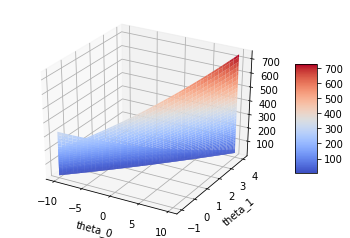

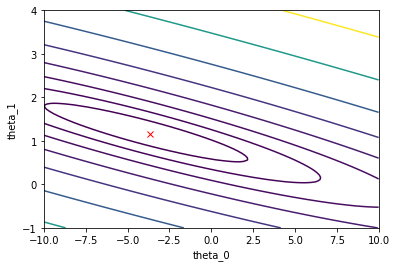

In [13]:
print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i,j] = computeCost(X, y, t)
        
J_vals = J_vals.conj().T

# Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm, 
                       linewidth = 0, antialiased = True)
plt.xlabel('theta_0')             # set the x-axis label
plt.ylabel('theta_1')             # set the y-axis label
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Contour plot
levels = np.logspace(-2, 3, num=20) # make sure the contour plot are spaced logarithmically 
plt.figure()
CS = plt.contour(theta0_vals, theta1_vals, J_vals, levels)
plt.xlabel('theta_0')             # set the x-axis label
plt.ylabel('theta_1')             # set the y-axis label
plt.plot(theta[0], theta[1], color = 'r', marker = 'x')
plt.show()